In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
from matplotlib.dates import datestr2num

In [93]:
results = pd.read_csv('entry_results.csv', header=0)

In [94]:
results

,time_of_run,BATCH_SIZE,TRAIN_SPLIT,NUM_FEATURES,NUM_UNITS,NUM_USERS,NUM_EPOCHS,EPSILON,DELTA,NORMCLIP,...,PRIVATIZER,train_a_loss,train_p_loss,u_estimate_acc,loc_estimate_error,test_a_loss,signal_map_error,distortion_error,loc_error,density_error
0,2019-05-10 11:07:47.931960,128,0.8,24,32,9,1,0.10,0.00001,4.0,...,noise_privatizer,0.030192,-2.268746e-03,98.437500,0.007395,0.055286,0.000000,0.000000e+00,0.000000e+00,0.000000
1,2019-05-10 11:13:53.632966,128,0.8,24,32,9,1,0.10,0.00001,4.0,...,noise_privatizer,0.102862,2.760143e-02,98.437500,0.008610,0.120330,0.001794,9.829476e-03,9.196847e-03,0.011963
2,2019-05-10 11:19:23.620552,128,0.8,24,32,9,1,0.10,0.00001,4.0,...,noise_privatizer,0.298617,2.244745e-01,96.093750,0.022377,0.111007,0.026050,3.918747e-02,3.704035e-02,1.665283
3,2019-05-10 11:24:34.964791,128,0.8,24,32,9,2,0.10,0.00001,4.0,...,noise_privatizer,0.118935,4.757190e-01,98.437500,0.017757,0.052582,0.054401,4.043729e-02,3.765385e-02,0.157471
4,2019-05-10 11:32:33.514346,128,0.8,24,32,9,1,0.10,0.00001,4.0,...,noise_privatizer,0.077902,2.059759e-01,94.531250,0.030251,0.137625,0.011566,4.001882e-02,3.805162e-02,0.211914
5,2019-05-10 11:35:43.055057,128,0.8,24,32,9,1,0.10,0.00001,4.0,...,noise_privatizer,0.192258,1.035250e+00,94.140625,0.038615,0.176787,0.025223,9.148374e-02,8.238000e-02,0.448486
6,2019-05-10 11:40:09.737286,128,0.8,24,32,9,3,0.10,0.00001,4.0,...,noise_privatizer,0.247322,2.155410e-01,93.359375,0.033617,0.173909,0.003776,8.787266e-02,8.951048e-02,0.233398
7,2019-05-10 11:55:59.763078,128,0.8,24,32,9,3,0.10,0.00001,4.0,...,noise_privatizer,0.364024,8.002430e-01,91.015625,0.046964,0.245128,0.110811,1.597189e-01,1.567052e-01,0.567871
8,2019-05-13 20:27:03.657289,128,0.8,24,32,9,1,0.10,0.00001,4.0,...,noise_privatizer,0.468337,6.845562e-01,89.062500,0.100681,0.311975,0.030074,2.399773e-01,2.446036e-01,0.618652
9,2019-05-13 20:30:29.593822,128,0.8,24,32,9,1,0.10,0.00001,4.0,...,noise_privatizer,0.568903,8.230353e-01,83.984375,0.116673,0.497042,0.011640,3.630596e-01,3.817819e-01,0.472656


In [30]:
results.iloc[-1]

time_of_run            2019-05-14 11:11:57.728877
 BATCH_SIZE                                   128
 TRAIN_SPLIT                                  0.8
 NUM_FEATURES                                  24
 NUM_UNITS                                     32
 NUM_USERS                                      9
 NUM_EPOCHS                                     1
 EPSILON                                      0.2
 DELTA                                     0.0001
 NORMCLIP                                       7
 SIGMA                                          0
 RHO                                          0.9
 w_map                                          1
 w_distortion                                   1
 w_distance                                     1
 w_density                                      1
 w_ID                                           1
 w_loc                                          1
 MAP_PARAMS                                     2
 NUM_GRIDS                                      4


Text(0.5, 0.98, 'Noise Privatizer, Two Epochs of Training')

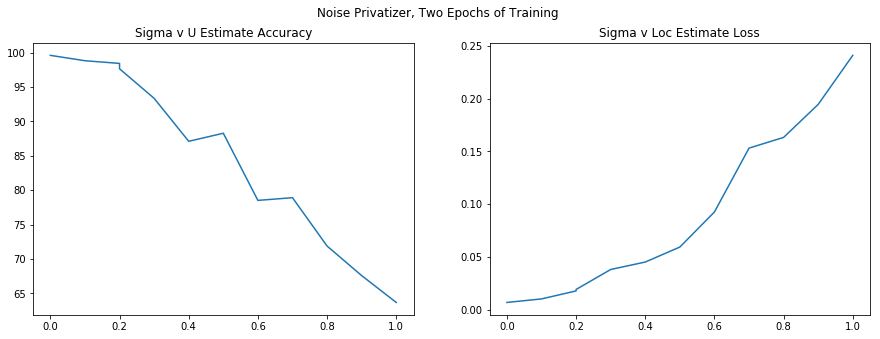

In [230]:
one_epoch = results.values[np.where(results.values[:,6]==1)]
two_epoch = results.values[np.where(results.values[:,6]==2)]

p = two_epoch
idx=np.argsort(p[:,10])
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(p[idx][:,10], p[idx][:,25])
ax[1].plot(p[idx][:,10], p[idx][:,26])
ax[0].set_title("Sigma v U Estimate Accuracy")
ax[1].set_title("Sigma v Loc Estimate Loss")
fig.suptitle("Noise Privatizer, Two Epochs of Training")

Text(0.5, 1.0, 'Sigma v Utility Error, Two Epochs')

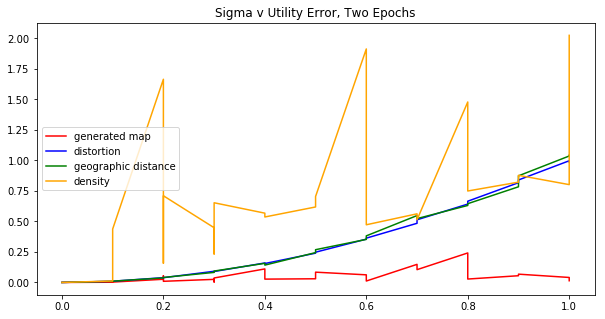

In [241]:
one_epoch = results.values[np.where(results.values[:,6]==1)]
two_epoch = results.values[np.where(results.values[:,6]==2)]

p = results.values
idx=np.argsort(p[:,10])

plt.figure(figsize=(10,5))
plt.plot(p[idx][:,10], p[idx][:,28],c='r')
plt.plot(p[idx][:,10], p[idx][:,29],c='b')
plt.plot(p[idx][:,10], p[idx][:,30],c='g')
plt.plot(p[idx][:,10], p[idx][:,31],c='orange')
plt.legend(["generated map","distortion","geographic distance","density"])
plt.title("Sigma v Utility Error, Two Epochs")

In [267]:
def analytical_gaussian_sigma(eta, epsilon, delta):
    def phi(x):
        return 1/2*(1+math.erf(x/math.sqrt(2)))
    delta_0 = phi(0)-math.e**epsilon*phi(-math.sqrt(2*epsilon))
    def Bplus(v):
        return phi(math.sqrt(epsilon*v))-math.e**epsilon*phi(-math.sqrt(epsilon*(v+2)))
    def Bminus(v):
        return phi(-math.sqrt(epsilon*v))-math.e**epsilon*phi(-math.sqrt(epsilon*(v+2)))
    if delta >= delta_0:
        print("here")
        vstar = 0
        while Bplus(vstar) <= delta:
            vstar += 1
            if vstar == 1000000:
                return 0
        if vstar == 0:
            print(0)
        alpha = math.sqrt(1+vstar/2)-math.sqrt(vstar/2)
    else:
        ustar = 0
        while Bminus(ustar) > delta:
            ustar += 1
        if ustar == 0:
            print(ustar)
        alpha = math.sqrt(1+ustar/2)+math.sqrt(ustar/2)
    sigma = alpha*eta/math.sqrt(2*epsilon)
    return sigma

Text(0.5, 1.0, 'Sigma varying with epsilon, holding norm_clip=7 (to clip 5.82% of entries) and delta=0.00001')

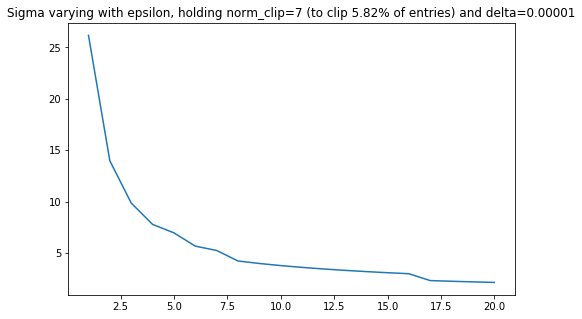

In [281]:
eta = 7
epsilon = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19,20.0])
delta = 0.00001
plt.figure(figsize=(8,5))
sigma = [analytical_gaussian_sigma(eta, eps, delta) for eps in epsilon]
plt.plot(epsilon, np.array(sigma))
plt.title("Sigma varying with epsilon, holding norm_clip=7 (to clip 5.82% of entries) and delta=0.00001")

In [1]:
userID = {
'a841f74e620f74ec443b7a25d7569545':0,
'22223276ea84bbce3a62073c164391fd':1,
'510635002cb29804d54bff664cab52be':2,
'7cbc37da05801d46e7d80c3b99fd5adb':3,
'7023889b4439d2c02977ba152d6f4c6e':4,
'8425a81da55ec16b7f9f80c139c235a2':5,
'6882f6cf8c72d6324ba7e6bb42c9c7c2':6,
'1e33db5d2be36268b944359fbdbdad21':7,
'892d2c3aae6e51f23bf8666c2314b52f':8,
}

In [6]:
dataset = pd.read_csv('augmented_data.csv', header=0, usecols = [0,1]+list(range(2,21))+list(range(22,26)), 
                                          converters={0:lambda x: datestr2num(x), 1:lambda x: userID[x]})

In [12]:
dataset.corr(method='pearson')['iPhoneUID']

timestamp             0.328645
iPhoneUID             1.000000
dt1                  -0.006531
dt2                   0.168020
dt3                   0.153880
dt4                   0.170291
dt5                   0.155494
rssi                  0.451990
rssi1                 0.548773
rssi2                 0.548444
rssi3                 0.549092
rssi4                 0.550785
rssi5                 0.544151
latitude             -0.457103
longitude            -0.000910
finalLatitude        -0.009387
finalLongitude        0.001952
horizontalAccuracy   -0.072463
isMoving             -0.093964
txPower              -0.036515
cellID                0.214576
MNC                  -0.001060
ARFCN                 0.454076
freq_dlink            0.244991
freq_uplink           0.254113
Name: iPhoneUID, dtype: float64

In [19]:
dataset.corr(method='pearson')['latitude']

timestamp            -0.303622
iPhoneUID            -0.457103
dt1                   0.111851
dt2                   0.079271
dt3                   0.074349
dt4                   0.082687
dt5                   0.074024
rssi                 -0.162258
rssi1                -0.327051
rssi2                -0.326631
rssi3                -0.326605
rssi4                -0.328105
rssi5                -0.323064
latitude              1.000000
longitude             0.687900
finalLatitude         0.024374
finalLongitude        0.046419
horizontalAccuracy    0.489340
isMoving              0.054698
txPower               0.039819
cellID               -0.367070
MNC                   0.002183
ARFCN                -0.304342
freq_dlink           -0.163840
freq_uplink          -0.169962
Name: latitude, dtype: float64

In [62]:
dataset.corr(method='pearson')['rssi']

timestamp             0.096147
iPhoneUID             0.451990
dt1                   0.016681
dt2                   0.002925
dt3                   0.000209
dt4                   0.000517
dt5                   0.000461
rssi                  1.000000
rssi1                 0.716287
rssi2                 0.713678
rssi3                 0.712608
rssi4                 0.713553
rssi5                 0.708956
latitude             -0.162258
longitude             0.063282
finalLatitude         0.000107
finalLongitude        0.008495
horizontalAccuracy    0.091258
isMoving             -0.074341
txPower              -0.029014
cellID                0.193557
MNC                  -0.012540
ARFCN                 0.183890
freq_dlink            0.099956
freq_uplink           0.103635
Name: rssi, dtype: float64

In [ ]:
one_epoch = results.values[np.where(results.values[:,6]==1)]
two_epoch = results.values[np.where(results.values[:,6]==2)]

p = two_epoch
idx=np.argsort(p[:,10])
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(p[idx][:,10], p[idx][:,25])
ax[1].plot(p[idx][:,10], p[idx][:,26])
ax[0].set_title("Sigma v U Estimate Accuracy")
ax[1].set_title("Sigma v Loc Estimate Loss")
fig.suptitle("Noise Privatizer, Two Epochs of Training")

In [65]:
dp = results.values[np.where(results.values[:,22]==' dp_privatizer')]

Text(0.5, 0.98, 'Local DP Privatizer, delta=0.00001')

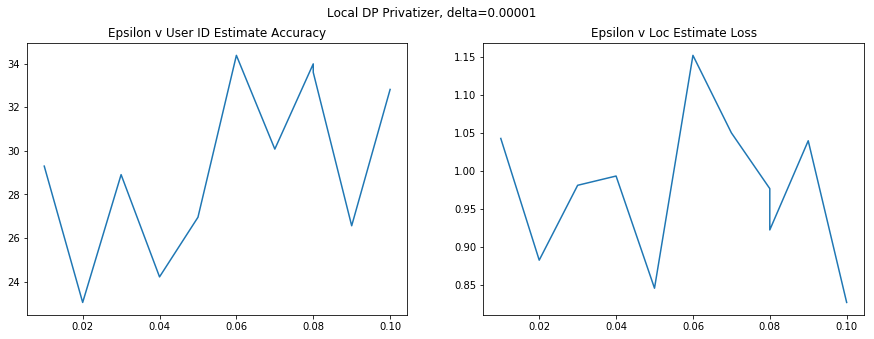

In [79]:
d4 = dp[np.where(dp[:,8]==0.00001)]
d3 = dp[np.where(dp[:,8]==0.0001)]
d2 = dp[np.where(dp[:,8]==0.001)]
d1 = dp[np.where(dp[:,8]==0.01)]
d0 = dp[np.where(dp[:,8]==0.1)]
do = dp[np.where(dp[:,8]==1.0)]

fig, ax = plt.subplots(1,2,figsize=(15,5))
# for p in [d4,d3,d2,d1,d0,do]:
d4 = d4[np.where(d4[:,7]<=0.1)]
for p in [d4]:
    idx=np.argsort(p[:,7])
    ax[0].plot(p[idx][:,7], p[idx][:,25])
    ax[1].plot(p[idx][:,7], p[idx][:,26])

# fig.legend(["delta = 0.00001","0.0001","0.001","0.01","0.1","1.0"])
ax[0].set_title("Epsilon v User ID Estimate Accuracy")
ax[1].set_title("Epsilon v Loc Estimate Loss")
fig.suptitle("Local DP Privatizer, delta=0.00001")

In [75]:
d4 = dp[np.where(dp[:,8]==0.00001)]
d4 = d4[np.where(d4[:,7]<=0.1)]

Text(0.5, 0.98, 'Utility v Epsilon - Local DP Privactizer, delta=0.00001')

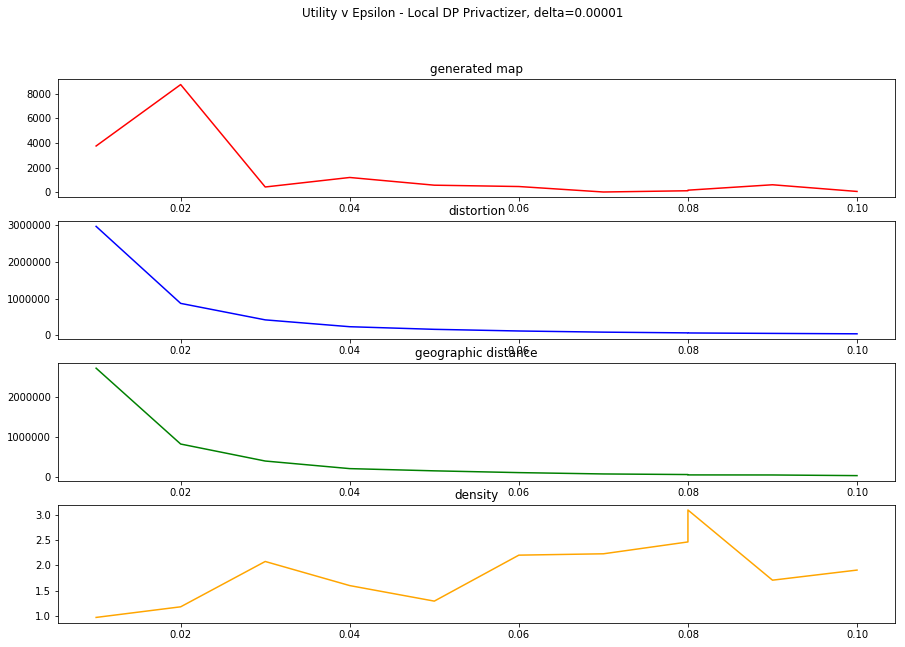

In [76]:
p = d4
idx=np.argsort(p[:,7])

fig, ax = plt.subplots(4,1,figsize=(15,10))
ax[0].plot(p[idx][:,7], p[idx][:,28],c='r')
ax[1].plot(p[idx][:,7], p[idx][:,29],c='b')
ax[2].plot(p[idx][:,7], p[idx][:,30],c='g')
ax[3].plot(p[idx][:,7], p[idx][:,31],c='orange')
ax[0].set_title("generated map")
ax[1].set_title("distortion")
ax[2].set_title("geographic distance")
ax[3].set_title("density")
fig.suptitle("Utility v Epsilon - Local DP Privactizer, delta=0.00001")

In [106]:
sigma0 = results.values[np.where(results.values[:,10]==0.0)]
sigma0 = sigma0[np.where(sigma0[:,22]==' noise_privatizer')]
sigma0 = sigma0[np.where(sigma0[:,6]==1)]

Text(0.5, 1.0, 'Adversary Loss v. Training Portion')

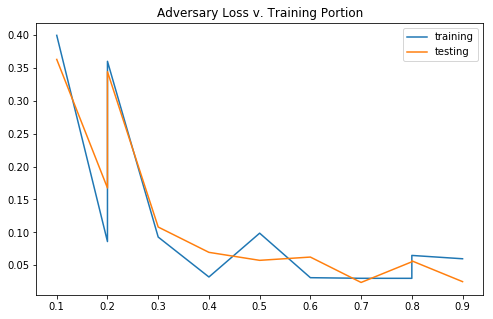

In [111]:
idx=np.argsort(sigma0[:,2])
plt.figure(figsize=(8,5))
plt.plot(sigma0[idx][:,2],sigma0[idx][:,23])
plt.plot(sigma0[idx][:,2],sigma0[idx][:,27])
plt.legend(["training","testing"])
plt.title("Adversary Loss v. Training Portion")